# Day 2: Factor Models

Yesterday we XXXXX. (ADD INTRO BASED ON DAY 1) 

Today, we are going to explore more our embeddings dataset. 



## 1. Loading the datasets 

The first step is to clone the repo with the data. The original dataset available at [Kaggle](https://www.kaggle.com/tunguz/rxrx19a?select=embeddings.csv) has more than 3 GB and 305520 images. So we create a subset with only 15000 images. 

If you are curious to know how we created this subset, you can check our code in the [github repositoty](https://github.com/ai4all-sfu/comp-biology-2020/blob/master/day0-data-preprocessing.ipynb). 

In [ ]:
! git clone https://github.com/ai4all-sfu/comp-biology-2020.git

fatal: destination path 'comp-biology-2020' already exists and is not an empty directory.


[link text](https://)To check if the files are available, we use the code below. We should see two folders: 'sample_data' and 'comp-biology-2020'. 

In [ ]:
! ls

comp-biology-2020  sample_data


## 2. Analysis

The data now is read to be used, so we can start our analysis! 


In [ ]:
#Loading the libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
#Loading Files we cloned from github 
embeddings = pd.read_pickle('comp-biology-2020/embeddings.pkl', compression = 'xz')
metadata = pd.read_pickle('comp-biology-2020/metadata.pkl', compression = 'xz')

#changing the index
embeddings.set_index('site_id', inplace=True)


With these libraries and the files load, the data is read for our analysis. 


In [ ]:
#Checking how big are the datasets: 
print('Dimensions embeddings data: ',embeddings.shape)
print('Dimensions metadata data  : ',metadata.shape)

Dimensions embeddings data:  (15000, 1024)
Dimensions metadata data  :  (15000, 10)


We can also check the format of the metadata file:

In [ ]:
metadata.head()

,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc
31,HRCE-1_1_H24_1,HRCE-1_1_H24,HRCE,HRCE-1,1,H24,1,Mock,NaN,NaN
81,HRCE-1_3_E40_1,HRCE-1_3_E40,HRCE,HRCE-1,3,E40,1,Mock,NaN,NaN
101,HRCE-1_3_Q40_1,HRCE-1_3_Q40,HRCE,HRCE-1,3,Q40,1,Mock,NaN,NaN
115,HRCE-1_3_H16_1,HRCE-1_3_H16,HRCE,HRCE-1,3,H16,1,Mock,NaN,NaN
187,HRCE-1_5_F08_1,HRCE-1_5_F08,HRCE,HRCE-1,5,F08,1,Mock,NaN,NaN


The last step in the pre-processing is to standardize the dataset. This is a crucial step to avoid that some features have a more considerable influence in the final results only because their scale is larger than other features.


In [ ]:
from sklearn.preprocessing import StandardScaler
#standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)
x = StandardScaler().fit_transform(embeddings)

The metadata has the label of interest in the column 'disease_condition', and it will be more explored in the Day 3. 

Today, we are going to work on a very common challenge in Machine Learning: dimensionality reduction. 

The embeddings file has 1025 columns. Such large number of columns increase the complexity of the classification models, cause overfitting, and be very time-consuming. 

In the following analysis, we will explore three different methods to reduce the dimensionality of these datasets, known as *factor models*. 

To see more details about each method, check the slides. 

* Principal Components Analysis (PCA)

In [ ]:
#Loading libraries 
from sklearn.decomposition import PCA 
solver = ['auto', 'full', 'arpack', 'randomized']


In [ ]:
#Number of features
k1 = 50 
#Model definition
pca = PCA(n_components=k1, svd_solver =solver[0]) 
#Fitting
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

How good are the latent features?

When performing a PCA, a simple way to verify if the latent features are good is to check the variance explained by the principal components.
Below, we will construct a plot to see the value by each component individually and a cumulative value.

In [ ]:
#Cumulative value: 
print('Explained Variance:', sum(pca.explained_variance_ratio_)) 


Explained Variance: 0.8739240320521584


Text(0.5, 0, 'Number of Components')

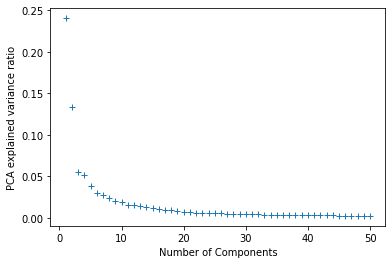

In [ ]:
fig, ax = plt.subplots()

ax.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax.set_ylabel('PCA explained variance ratio')
ax.set_xlabel('Number of Components')


For k1=50 and solver = 'auto', the PCA results seems good. So we will move foward with these latent features. 


In [ ]:
principalComponents = pca.fit_transform(x)


### Activity 1: 

Explore other combinations of K and svd_solvers. Can you find other promissing sets of latent features?

Save your best result to be used in the classification model tomorrow.

In [ ]:
#Model definition and fit: 


In [ ]:
#Evaluation: Plot and percentage of variance explained 

In [23]:
mypca = pca.fit_transform(x) #your new pca
np.savez_compressed('mypca.npz',mypca)

After saving, click on the folders on the left side, and you should see your 'mypca.npz' file. If not, click in 'refresh'.

Download your file by clicking on the three dots on the right side of your file's name. 

* Singular value decomposition (SVD) 

In [ ]:
from sklearn.decomposition import TruncatedSVD

k2 = 60
#model definition and fitting
svd = TruncatedSVD(n_components=k2, random_state=0)
svd.fit(x)

TruncatedSVD(algorithm='randomized', n_components=60, n_iter=5, random_state=0,
             tol=0.0)

The evaluation is very similar to the PCA evaluation: 

Explained Variance: 0.8953418958361613


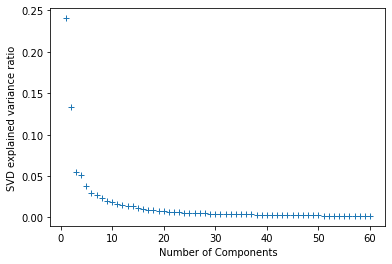

In [ ]:
#evaluation

fig, ax = plt.subplots()

ax.plot(np.arange(1, k2 + 1),
         svd.explained_variance_ratio_, '+', linewidth=2)
ax.set_ylabel('SVD explained variance ratio')
ax.set_xlabel('Number of Components')

print('Explained Variance:', sum(svd.explained_variance_ratio_)) 


The SVD results are good for k2 = 60. 


In [ ]:
svdtransformed = svd.transform(x)
print('SVD latent variables shape: ', svdtransformed.shape)


SVD latent variables shape:  (15000, 60)


Activity 2: 

Choose a new value of k2. Run the SVD again and save your output for tomorrow's lesson. 

In [ ]:
#model definition and fitting


In [ ]:
#evaluation

In [ ]:
mysvd = svd.transform(x)
np.savez_compressed('mysvd.npz',mysvd)

#Donwload the file as previously explained.

* Autoenconder 

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

#Don't worry about this class object, we are only going to use it :) 
#Reference: https://rubikscode.net/2018/11/26/3-ways-to-implement-autoencoders-with-tensorflow-and-python/
class Autoencoder(object):
    def __init__(self, inout_dim, encoded_dim):
        learning_rate = 0.1 
        
        # Weights and biases
        hiddel_layer_weights = tf.Variable(tf.random_normal([inout_dim, encoded_dim]))
        hiddel_layer_biases = tf.Variable(tf.random_normal([encoded_dim]))
        output_layer_weights = tf.Variable(tf.random_normal([encoded_dim, inout_dim]))
        output_layer_biases = tf.Variable(tf.random_normal([inout_dim]))
        
        # Neural network
        self._input_layer = tf.placeholder('float', [None, inout_dim])
        self._hidden_layer = tf.nn.sigmoid(tf.add(tf.matmul(self._input_layer, hiddel_layer_weights), hiddel_layer_biases))
        self._output_layer = tf.matmul(self._hidden_layer, output_layer_weights) + output_layer_biases
        self._real_output = tf.placeholder('float', [None, inout_dim])
        
        self._meansq = tf.reduce_mean(tf.square(self._output_layer - self._real_output))
        self._optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(self._meansq)
        self._training = tf.global_variables_initializer()
        self._session = tf.Session()
        
    def train(self, input_train, input_test, batch_size, epochs):
        self._session.run(self._training)
        
        for epoch in range(epochs):
            epoch_loss = 0
            for i in range(int(input_train.shape[0]/batch_size)):
                epoch_input = input_train[ i * batch_size : (i + 1) * batch_size ]
                _, c = self._session.run([self._optimizer, self._meansq], feed_dict={self._input_layer: epoch_input, self._real_output: epoch_input})
                epoch_loss += c
                print('Epoch', epoch, '/', epochs, 'loss:',epoch_loss)
        
    def getEncoded(self, item):
        encoded_ = self._session.run(self._hidden_layer, feed_dict={self._input_layer:[item]})
        return encoded_
    
    def getDecoded(self, item):
        decoded_ = self._session.run(self._output_layer, feed_dict={self._input_layer:[item]})
        return decoded_


Instructions for updating:
non-resource variables are not supported in the long term


For this factor model, we need to split the dataset in 2 parts: training and testing set. 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(x,test_size=0.33, random_state=42)


In [ ]:
#Model definition
autoencodertf = Autoencoder(x.shape[1], 32)

#Model Fitting
autoencodertf.train(x_train, x_test, 100, 50)



Streaming output truncated to the last 5000 lines.
Epoch 0 / 50 loss: 32.9808235168457
Epoch 0 / 50 loss: 49.237274169921875
Epoch 0 / 50 loss: 65.27854347229004
Epoch 0 / 50 loss: 81.40151977539062
Epoch 0 / 50 loss: 97.91126251220703
Epoch 0 / 50 loss: 114.19012260437012
Epoch 0 / 50 loss: 130.00238704681396
Epoch 0 / 50 loss: 145.72270488739014
Epoch 0 / 50 loss: 161.37966060638428
Epoch 0 / 50 loss: 176.7931261062622
Epoch 0 / 50 loss: 193.06431484222412
Epoch 0 / 50 loss: 208.23252296447754
Epoch 0 / 50 loss: 223.40059661865234
Epoch 0 / 50 loss: 238.68072128295898
Epoch 0 / 50 loss: 253.2527561187744
Epoch 0 / 50 loss: 268.2946186065674
Epoch 0 / 50 loss: 283.02435970306396
Epoch 0 / 50 loss: 297.3366279602051
Epoch 0 / 50 loss: 311.9849338531494
Epoch 0 / 50 loss: 326.51500701904297
Epoch 0 / 50 loss: 340.7377099990845
Epoch 0 / 50 loss: 354.4598751068115
Epoch 0 / 50 loss: 368.7489767074585
Epoch 0 / 50 loss: 382.32409477233887
Epoch 0 / 50 loss: 396.66203689575195
Epoch 0 / 50

Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
testing_error = []
training_error = []

for i in range(len(x_test)):
  testing_error.append(mean_squared_error(x_test[i], autoencodertf.getDecoded(x_test[i]).reshape(-1,1)))

for i in range(len(x_train)):
  training_error.append(mean_squared_error(x_train[i],autoencodertf.getDecoded(x_train[i]).reshape(-1,1))) 


In [ ]:
print('Mean Squared Error on Testing set',np.mean(testing_error))
print('Mean Squared Error on Training set',np.mean(training_error))

Mean Squared Error on Testing set 0.8593152017373249
Mean Squared Error on Training set 0.8175428617327041


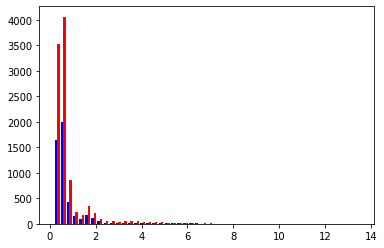

In [ ]:
histogram_data = plt.hist([testing_error, training_error], bins=50, color=['b','r'])

The error in the training and testing set looks similar and low, so there are evidence that our autoenconder is doing a good job. 

In [ ]:
#Latent Variables 
autoenconderlv = []

for i in range(len(x)):
  autoenconderlv.append( autoencodertf.getEncoded(x[i])[0])


In [ ]:
autoenconderlv = np.matrix(autoenconderlv)
print('Autoencoder latent variables shape: ', autoenconderlv.shape)


Autoencoder latent variables shape:  (15000, 32)
